**Importing the libraies**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Load & Clean the Dataset**

In [71]:
# Load dataset
df = pd.read_csv('Housing.csv')

# Preview
print(df.head())
print("\nData Types:\n", df.dtypes)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Types:
 price                int64
area                 int64
bedrooms             int64
bath

In [72]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Statistical Summary:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

  

**Exploratory Data Analysis (EDA)**


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


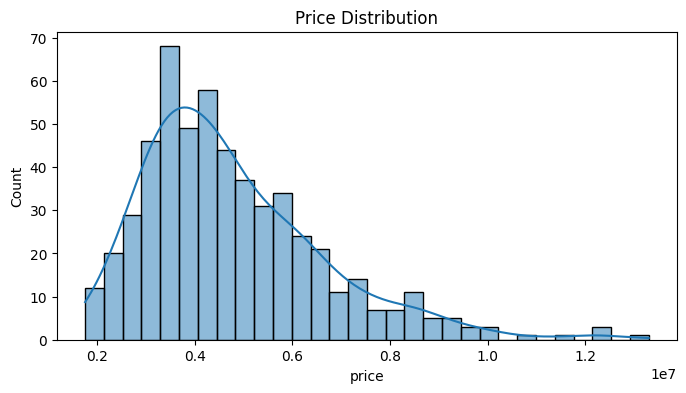

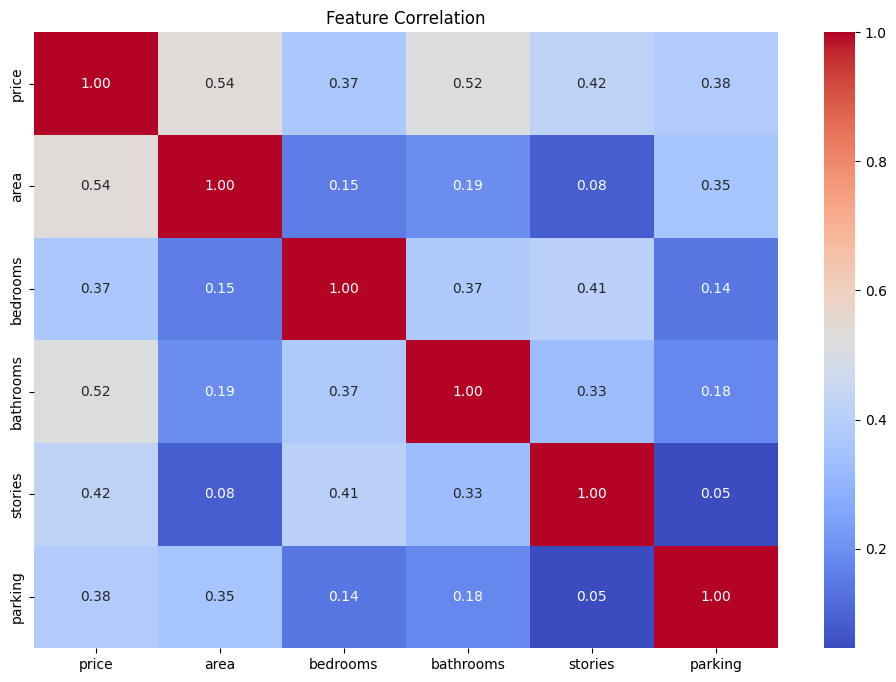

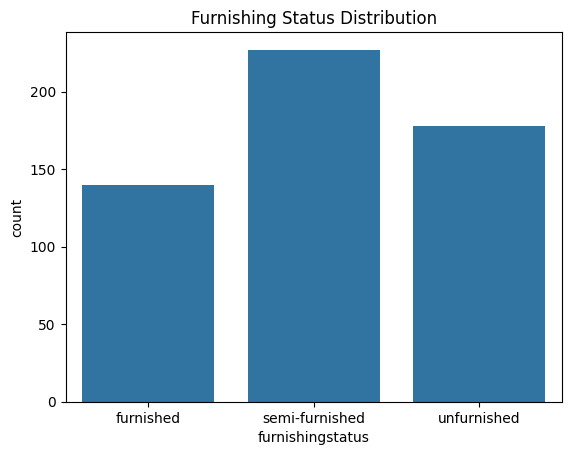

In [73]:
# Check nulls
print("\nMissing Values:\n", df.isnull().sum())

# Target variable distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Furnishing status count
sns.countplot(x='furnishingstatus', data=df)
plt.title("Furnishing Status Distribution")
plt.show()


**Data Preprocessing**

In [74]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [75]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

**Split into features and target**

In [76]:
X = df.drop('price', axis=1)
y = df['price']

**Feature scaling**

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

**Train - Test Spliting of Dataset**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Model Training: Train the Random Forest Model**

In [79]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

**EVALUATION**

In [80]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Model Evaluation:\nR² Score: {r2:.4f}\nRMSE: {rmse:.2f}")

Model Evaluation:
R² Score: 0.6133
RMSE: 1398017.76


**Save the trained model as pickle file**

In [81]:
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)